# PCA
* dataset : dogs vs cats(kaggle), animal-10(kaggle), cifar-10(tensorflow)


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/pca')
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/pca']

In [0]:
import tensorflow as tf
import sklearn
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import numpy as np
import seaborn as sns
import os
import cv2
from keras.datasets import cifar10
from cnn_models import vgg16

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


# dogs-vs-cats images PCA

In [0]:
CAT_PATH = '/content/gdrive/My Drive/dataset/cat_vs_dog/train/cat/'
DOG_PATH = '/content/gdrive/My Drive/dataset/cat_vs_dog/train/dog/'
cat_path_list = os.listdir(CAT_PATH)
dog_path_list = os.listdir(DOG_PATH)

cat_images_list = []
dog_images_list = []
for i in cat_path_list:
  cat_images_list.append(os.path.join(CAT_PATH, i))

for j in dog_path_list:
  dog_images_list.append(os.path.join(DOG_PATH, j))

In [0]:
print(len(cat_images_list), len(dog_images_list))

8500 8500


In [0]:
cat_images_list = cat_images_list[0:2000]
dog_images_list = dog_images_list[0:2000]
cat_labels = np.zeros(len(cat_images_list))
dog_labels = np.ones(len(dog_images_list))

In [0]:
print(len(cat_images_list), len(dog_images_list), len(cat_labels), len(dog_labels))

2000 2000 2000 2000


In [0]:
model = PCA(n_components=2, random_state=0)
ORIGIN_IMAGE_SHAPE = [224, 224, 3]
def get_pca_coordi(path_list):
  #pca_list = []
  resultlist = []
  for path in path_list:
    image = cv2.imread(path)
    image = np.resize(image, (ORIGIN_IMAGE_SHAPE[0],ORIGIN_IMAGE_SHAPE[1],ORIGIN_IMAGE_SHAPE[2]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = np.resize(image, (ORIGIN_IMAGE_SHAPE[0]*ORIGIN_IMAGE_SHAPE[1]*ORIGIN_IMAGE_SHAPE[2]))
    resultlist.append(image)

  pca_list = model.fit_transform(resultlist)
  #resultlist.clear()
  return pca_list

In [0]:
cat_coordi = get_pca_coordi(cat_images_list)
dog_coordi = get_pca_coordi(dog_images_list)

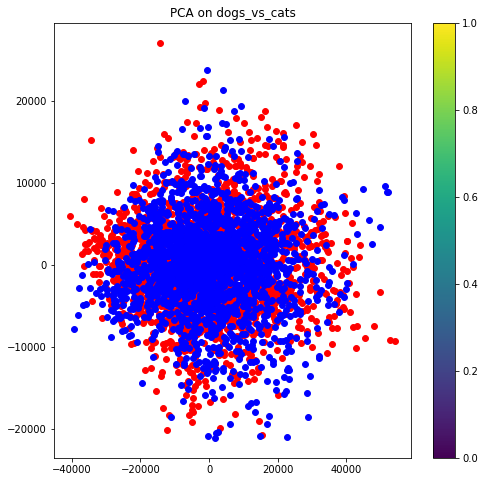

In [0]:
plt.figure(figsize=(8,8))
cmap = plt.cm.get_cmap('rainbow', 2)
plt.scatter(x=cat_coordi[:,0],y=cat_coordi[:,1],c='r',s=35,cmap=cmap)
plt.scatter(x=dog_coordi[:,0],y=dog_coordi[:,1],c='b',s=35,cmap=cmap)
plt.title("PCA on dogs_vs_cats")
plt.show()

In [0]:
vgg_trained_model = tf.keras.models.load_model('/content/gdrive/My Drive/vgg16_epoch250.h5')

In [0]:
vgg_trained_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584

In [0]:
flatten_model = tf.keras.models.Model(vgg_trained_model.inputs, vgg_trained_model.get_layer('flatten').output)

In [0]:
def get_features(model, images):
  features = []
  images = []
  for i in range(len(images)):
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.resize(img, (1,ORIGIN_IMAGE_SHAPE[0],ORIGIN_IMAGE_SHAPE[1],ORIGIN_IMAGE_SHAPE[2]))
    img = img/255.0
    feature = model(img)
    features.append(feature)
  #features.append(feature)
  return features

In [0]:
cat_features = get_features(flatten_model, cat_images_list)
dog_features = get_features(flatten_model, dog_images_list)

In [0]:
features = []
for i in range(len(cat_images_list)):
  img = cv2.imread(cat_images_list[i])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = np.resize(img, (1,ORIGIN_IMAGE_SHAPE[0],ORIGIN_IMAGE_SHAPE[1],ORIGIN_IMAGE_SHAPE[2]))
  img = img/255.0
  feature = flatten_model(img)
  features.append(feature)

In [0]:
features_dog = []
for i in range(len(dog_images_list)):
  img = cv2.imread(dog_images_list[i])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = np.resize(img, (1,ORIGIN_IMAGE_SHAPE[0],ORIGIN_IMAGE_SHAPE[1],ORIGIN_IMAGE_SHAPE[2]))
  img = img/255.0
  feature = flatten_model(img)
  features_dog.append(feature)

In [0]:
cat_features = np.array(features).reshape(2000,-1)
dog_features = np.array(features_dog).reshape(2000,-1)

In [0]:
feature_cat_coordi = model.fit_transform(cat_features)
feature_dog_coordi = model.fit_transform(dog_features)

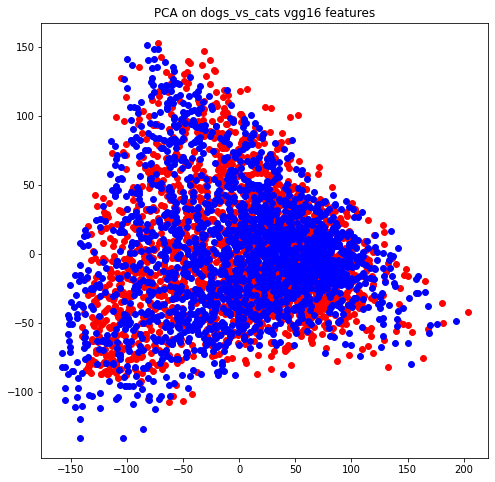

In [0]:
plt.figure(figsize=(8,8))
cmap = plt.cm.get_cmap('rainbow', 2)
plt.scatter(x=feature_cat_coordi[:,0],y=feature_cat_coordi[:,1],c='r',s=35,cmap=cmap)
plt.scatter(x=feature_dog_coordi[:,0],y=feature_dog_coordi[:,1],c='b',s=35,cmap=cmap)
plt.title("PCA on dogs_vs_cats vgg16 features")
plt.show()

# cifar-10 images PCA

In [0]:
# vgg16-cifar10 model
vgg16_cifar10_model = tf.keras.models.load_model('/content/gdrive/My Drive/pca/cifar10_vgg16.h5')
vgg16_cifar10_model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________

In [0]:
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

In [0]:
np.random.seed(seed=222)
idx=np.empty(0,dtype="int8")
for i in range(0,len(np.unique(y_train))):
    idx=np.append(idx,np.random.choice(np.where((y_train[0:len(y_train)])==i)[0],1000,replace=False))

x_train= x_train[idx]
y_train= y_train[idx]

In [0]:
labels=np.array(["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"])

In [0]:
print(x_train.shape)
print(y_train.shape)
print(np.unique(y_train,return_counts=True))

(10000, 32, 32, 3)
(10000, 1)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


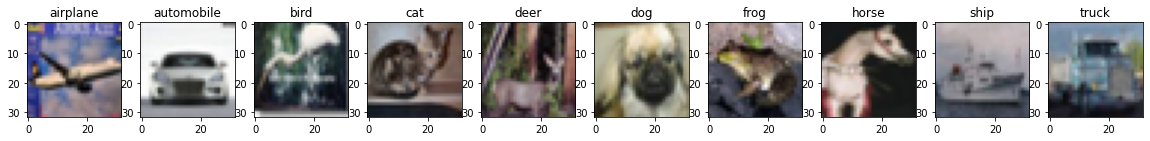

In [0]:
plt.figure(figsize=(20,20))
for i in range(10):
    rmd=np.random.choice(np.where(y_train==i)[0],1)
    plt.subplot(1,10,i+1)
    img=x_train[rmd]
    plt.imshow(img[0,:,:,:])
    plt.title(labels[i])

In [0]:
x_train_process = x_train[:,:,:,:]/255.0

In [0]:
pca_model = PCA(n_components=2, random_state=0)

In [0]:
pca_cifar10 = pca_model.fit_transform(x_train_process.reshape((len(x_train),32*32*3)))

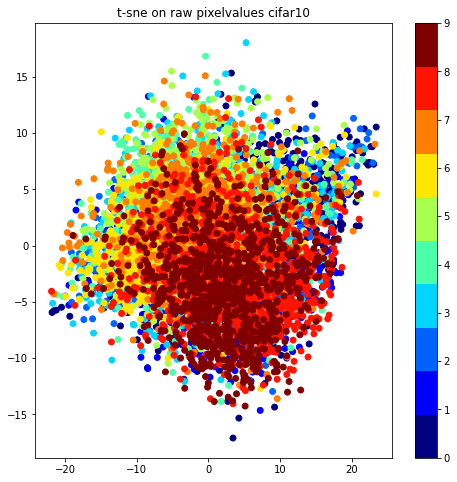

In [0]:
plt.figure(figsize=(8,8))
cmap = plt.cm.get_cmap('jet', 10)
plt.scatter(x=pca_cifar10[:,0],y=pca_cifar10[:,1],c=y_train.reshape(len(pca_cifar10)),s=35,cmap=cmap)
plt.title("t-sne on raw pixelvalues cifar10")
plt.colorbar()
plt.show()

In [0]:
flatten_vgg16_cifar10_model = tf.keras.models.Model(vgg16_cifar10_model.inputs, vgg16_cifar10_model.get_layer('flatten').output)

In [0]:
x_train_features = flatten_vgg16_cifar10_model(x_train_process)

In [0]:
x_train_features.shape

TensorShape([10000, 512])

In [0]:
pca_cifar10_feature_train = pca_model.fit_transform(x_train_features)

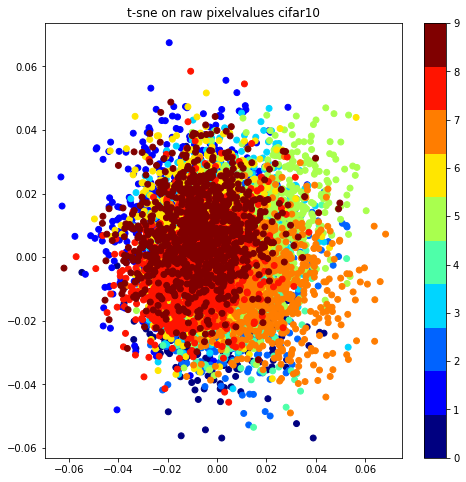

In [0]:
plt.figure(figsize=(8,8))
cmap = plt.cm.get_cmap('jet', 10)
plt.scatter(x=pca_cifar10_feature_train[:,0],y=pca_cifar10_feature_train[:,1],c=y_train.reshape(len(pca_cifar10_feature_train)),s=35,cmap=cmap)
plt.title("t-sne on raw pixelvalues cifar10")
plt.colorbar()
plt.show()

In [0]:
np.random.seed(seed=222)
idx=np.empty(0,dtype="int8")
for i in range(0,len(np.unique(y_test))):
    idx=np.append(idx,np.random.choice(np.where((y_test[0:len(y_test)])==i)[0],300,replace=False))

x_test= x_test[idx]
y_test= y_test[idx]

In [0]:
x_test_process = x_test[:,:,:,:]/255.0

In [0]:
pca_cifar10_test = pca_model.fit_transform(x_test_process.reshape((len(x_test),32*32*3)))

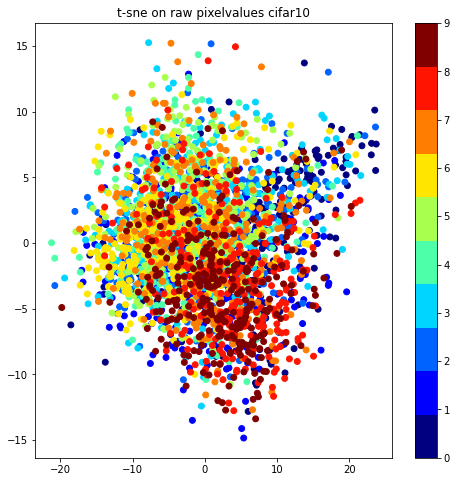

In [0]:
plt.figure(figsize=(8,8))
cmap = plt.cm.get_cmap('jet', 10)
plt.scatter(x=pca_cifar10_test[:,0],y=pca_cifar10_test[:,1],c=y_test.reshape(len(pca_cifar10_test)),s=35,cmap=cmap)
plt.title("t-sne on raw pixelvalues cifar10")
plt.colorbar()
plt.show()

In [0]:
x_test_features = flatten_vgg16_cifar10_model(x_test_process)

In [0]:
pca_cifar10_feature_test = pca_model.fit_transform(x_test_features)

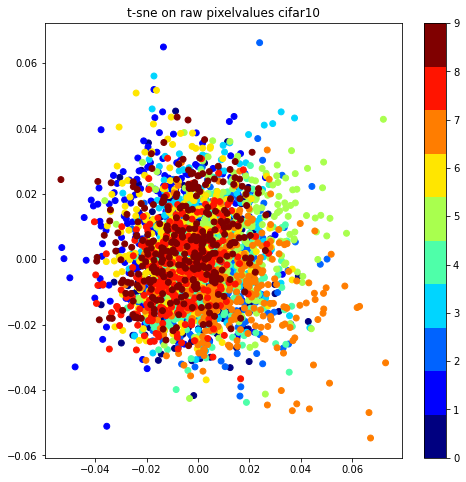

In [0]:
plt.figure(figsize=(8,8))
cmap = plt.cm.get_cmap('jet', 10)
plt.scatter(x=pca_cifar10_feature_test[:,0],y=pca_cifar10_feature_test[:,1],c=y_test.reshape(len(pca_cifar10_feature_test)),s=35,cmap=cmap)
plt.title("t-sne on raw pixelvalues cifar10")
plt.colorbar()
plt.show()